In [1]:
from data.processing import DataProcessing, DataSplit
from metrics import show_metrics
import warnings
from sklearn.preprocessing import binarize
from sklearn.linear_model import LogisticRegression


warnings.filterwarnings("ignore")

In [2]:
data_processing = DataProcessing()
data = DataProcessing.get_data("/Users/mkhachatryan/Codes/Econometrics-Project/data_/weatherAUS.csv")

In [3]:

X_train, X_valid, X_test, y_train, y_valid, y_test = DataSplit().split(data)

X_train = data_processing.process(X_train)
X_valid = data_processing.process(X_valid)
X_test = data_processing.process(X_test)

_, X_valid = data_processing.scaler(X_train, X_valid)
X_train, X_test = data_processing.scaler(X_train, X_test)

y_train= data_processing.process_target(y_train )
y_valid = data_processing.process_target(y_valid)
y_test = data_processing.process_target(y_test )


In [4]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
y_predict_proba_valid = logreg.predict_proba(X_valid)
y_predic_valid = logreg.predict(X_valid)

Recall or Sensitivity : 0.4940
Precision : 0.7258
F-1 Score:  0.5878932064499074
ROC-AUC:  0.7205262949195215
PR-AUC:  nan


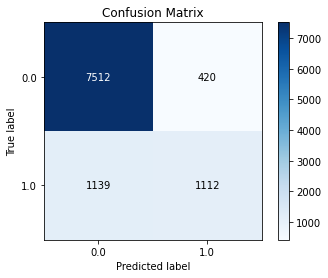

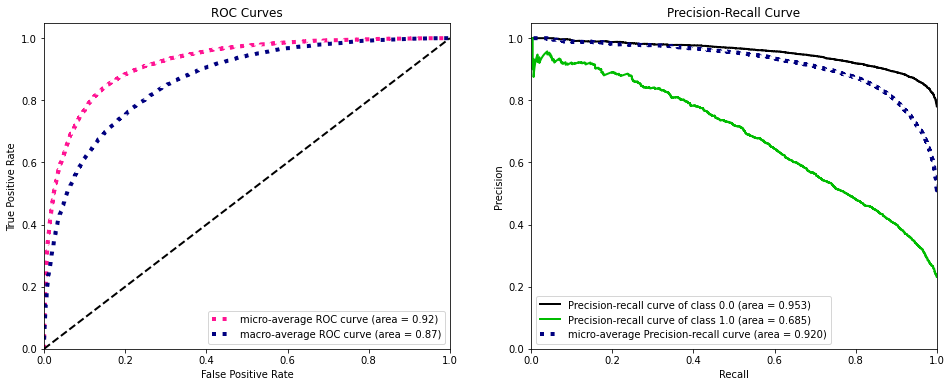

In [6]:
show_metrics(y_valid, y_predic_valid, y_predict_proba_valid)

# Changing Treshold

**************************************************
Results with threshold 1
Recall or Sensitivity : 0.9183
Precision : 0.3769
F-1 Score:  0.534453781512605
ROC-AUC:  0.7437359324583257
PR-AUC:  nan


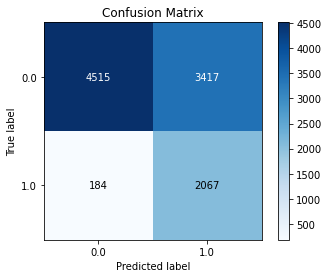

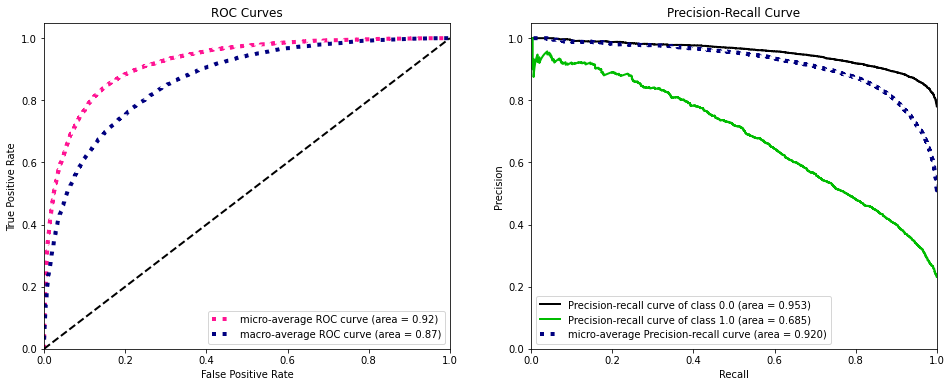

**************************************************
**************************************************
Results with threshold 2
Recall or Sensitivity : 0.7916
Precision : 0.4901
F-1 Score:  0.6054017326312213
ROC-AUC:  0.7789556969469276
PR-AUC:  nan


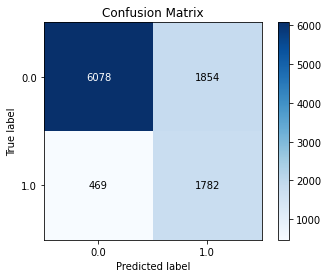

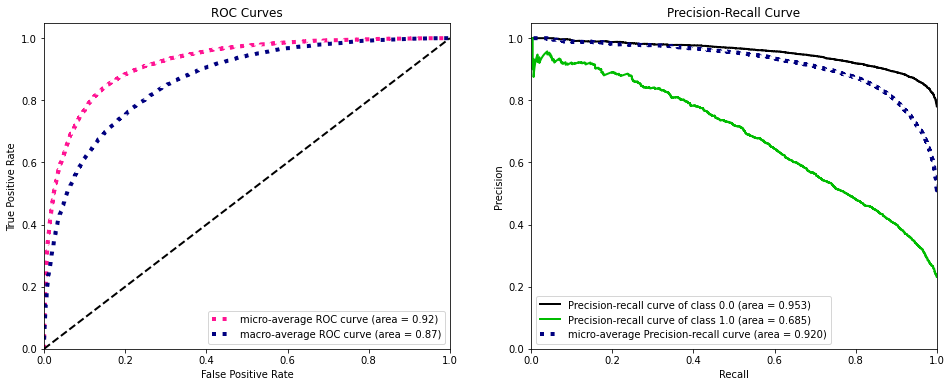

**************************************************
**************************************************
Results with threshold 3
Recall or Sensitivity : 0.6793
Precision : 0.5770
F-1 Score:  0.6239542950418282
ROC-AUC:  0.7689636958572567
PR-AUC:  nan


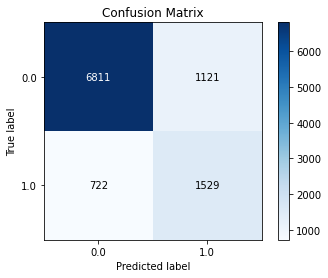

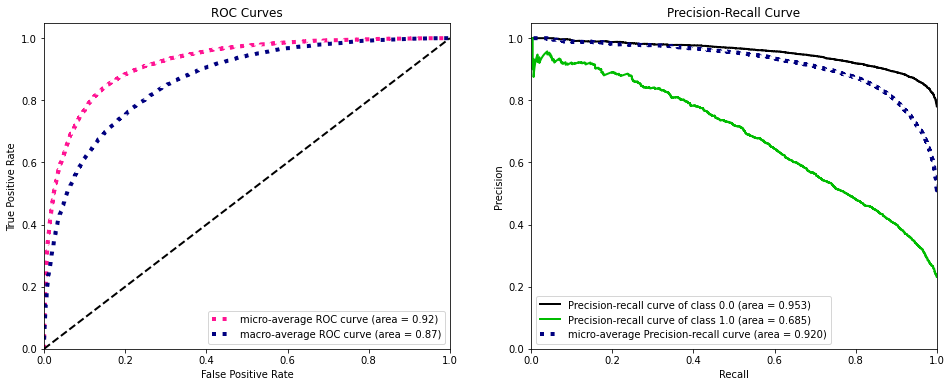

**************************************************
**************************************************
Results with threshold 4
Recall or Sensitivity : 0.5904
Precision : 0.6515
F-1 Score:  0.6194360288976928
ROC-AUC:  0.7503836755020966
PR-AUC:  nan


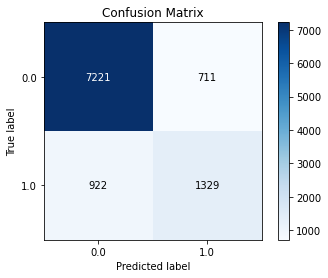

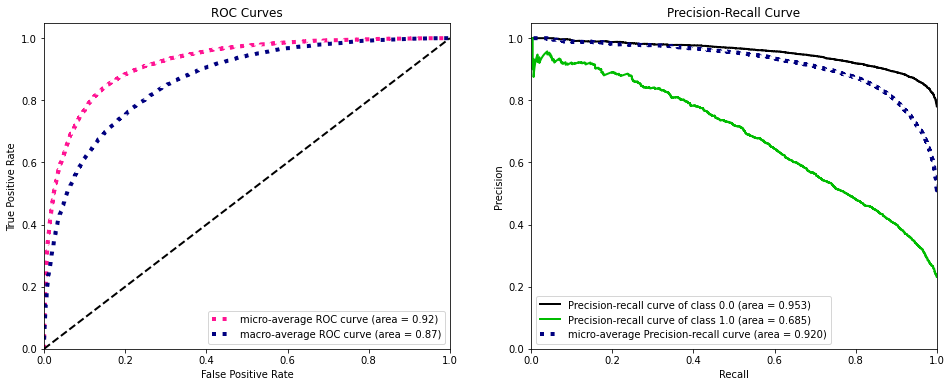

**************************************************


In [8]:

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_valid)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)


    print ("*"*50)
    print(f"Results with threshold {i}")
    show_metrics(y_valid, y_pred2, logreg.predict_proba(X_valid))
    print ("*"*50)

# Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 2,
                           verbose=1)


grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10]}],
             scoring='roc_auc', verbose=1)

In [10]:
print('\n\nEstimator that was chosen by the search :','\n\n', grid_search.best_estimator_)



Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [14]:
best_model = LogisticRegression(**grid_search.best_params_, solver="liblinear")

In [15]:
best_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [16]:
y_predict_best_proba_valid = best_model.predict_proba(X_valid)
y_predic_best_valid = best_model.predict(X_valid)

Recall or Sensitivity : 0.4940
Precision : 0.7258
F-1 Score:  0.5878932064499074
ROC-AUC:  0.7205262949195215
PR-AUC:  nan


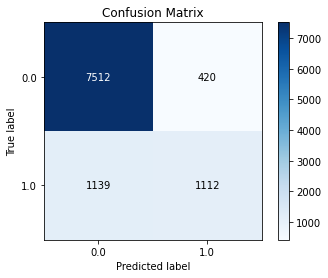

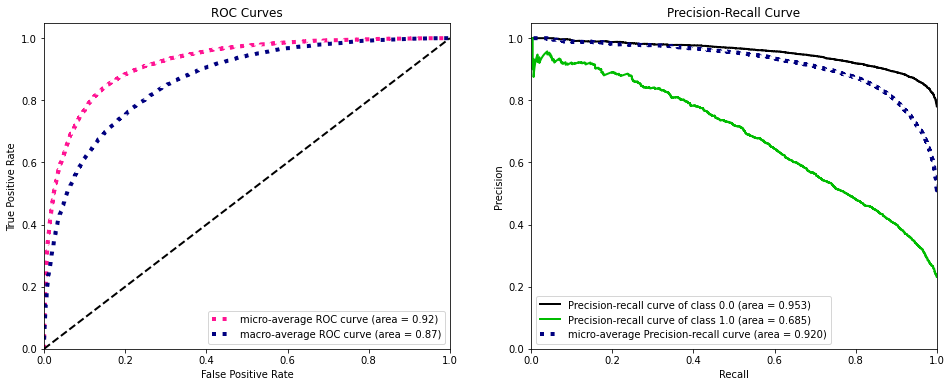

In [17]:
show_metrics(y_valid, y_predic_best_valid, y_predict_proba_valid)

# Thresholds

**************************************************
Results with threshold 1
Recall or Sensitivity : 0.9200
Precision : 0.3804
F-1 Score:  0.5382716049382715
ROC-AUC:  0.7473980018518134
PR-AUC:  nan


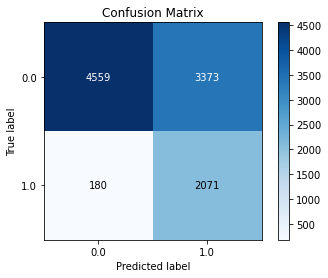

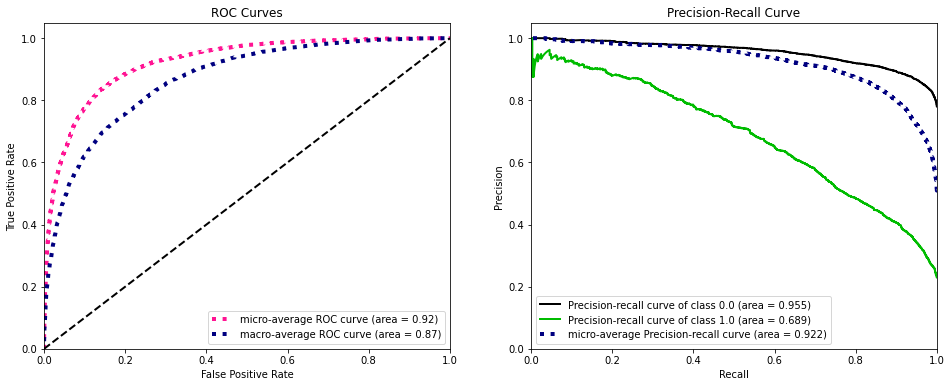

**************************************************
**************************************************
Results with threshold 2
Recall or Sensitivity : 0.7854
Precision : 0.4919
F-1 Score:  0.604961505560308
ROC-AUC:  0.7776109704590305
PR-AUC:  nan


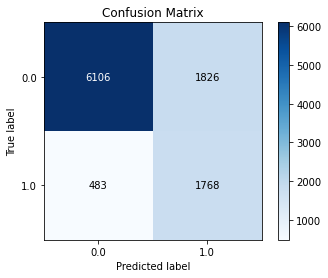

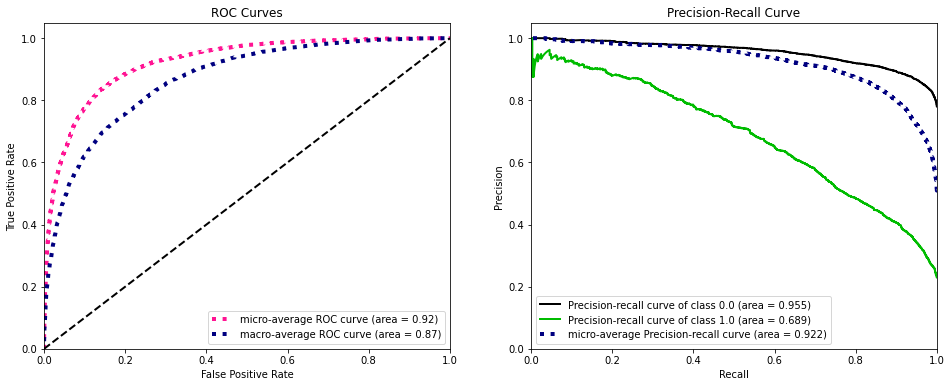

**************************************************
**************************************************
Results with threshold 3
Recall or Sensitivity : 0.6926
Precision : 0.5830
F-1 Score:  0.6330964467005077
ROC-AUC:  0.776005615703269
PR-AUC:  nan


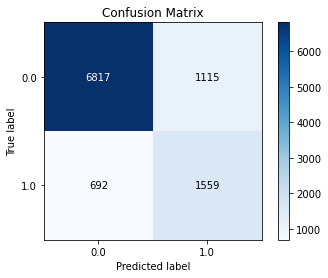

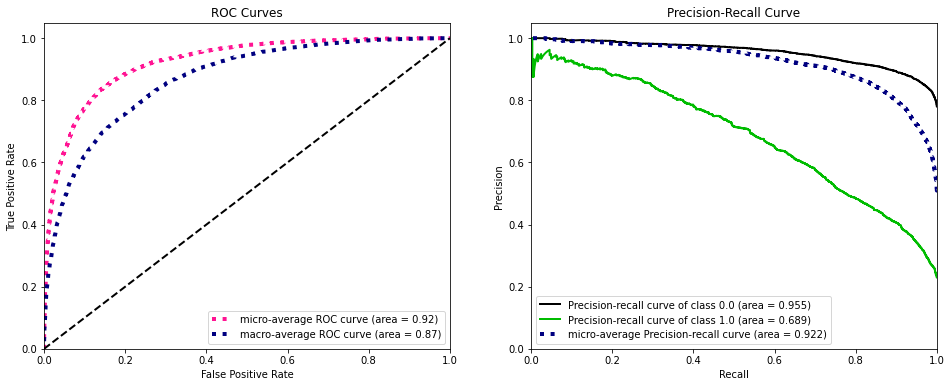

**************************************************
**************************************************
Results with threshold 4
Recall or Sensitivity : 0.5873
Precision : 0.6600
F-1 Score:  0.62153267512929
ROC-AUC:  0.750719885127538
PR-AUC:  nan


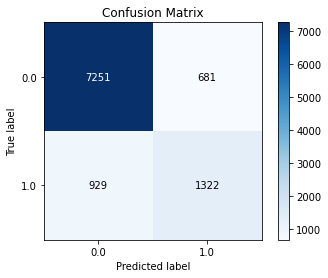

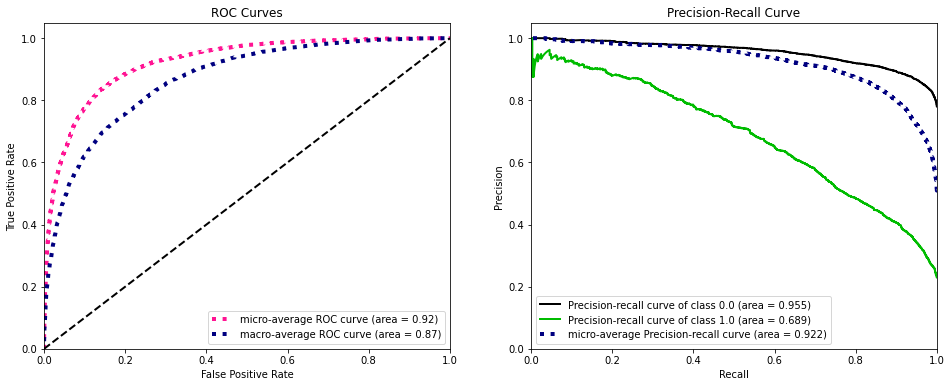

**************************************************


In [18]:
for i in range(1,5):

    cm1=0

    y_pred1 = best_model.predict_proba(X_valid)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold = i/10)


    print ("*"*50)
    print(f"Results with threshold {i}")
    show_metrics(y_valid, y_pred2, best_model.predict_proba(X_valid))
    print ("*"*50)

# Final Evaluation on Test set

Best threshold of our case is 0.4 to maximize F-1 score.

In [28]:
y_predict_proba_best_test = best_model.predict_proba(X_test)[:,1]
y_predict_proba_best_test = y_predict_proba_best_test.reshape(-1,1)
y_pred_binar_best_test = binarize(y_predict_proba_best_test, threshold = 0.4)

Recall or Sensitivity : 0.6010
Precision : 0.6639
F-1 Score:  0.6308673188963395
ROC-AUC:  0.7578789501750269
PR-AUC:  nan


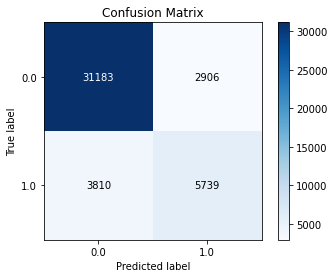

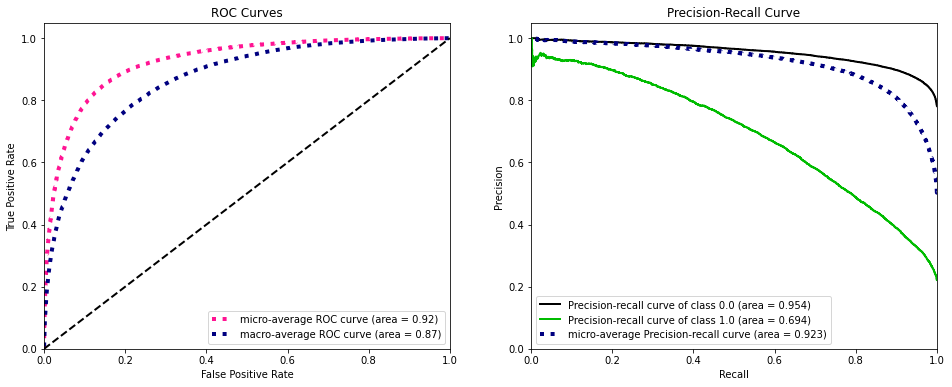

In [29]:
show_metrics(y_test, y_pred_binar_best_test, best_model.predict_proba(X_test))